## Smoking and Drinking Dataset with body signal

### Подключение модулей

In [1]:
# импортируем необходимые модули
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, RocCurveDisplay, precision_score, recall_score, f1_score

### Загрузка данных

In [2]:
# загружаем данные из файла в формате CSV и сохраняем в дата-фрейм (переменную df)
df = pd.read_csv('smoking_driking_dataset_Ver01.csv')

In [3]:
df.head(20)

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N
5,Male,50,165,55,75.0,1.2,1.5,1.0,1.0,142.0,...,95.0,232.0,13.8,3.0,0.8,29.0,40.0,37.0,3.0,Y
6,Female,45,150,55,69.0,0.5,0.4,1.0,1.0,101.0,...,115.0,75.0,12.3,1.0,0.8,19.0,12.0,12.0,1.0,N
7,Male,35,175,65,84.2,1.2,1.0,1.0,1.0,132.0,...,107.0,101.0,14.4,1.0,0.8,18.0,18.0,35.0,3.0,Y
8,Male,55,170,75,84.0,1.2,0.9,1.0,1.0,145.0,...,141.0,100.0,15.1,1.0,0.8,32.0,23.0,26.0,1.0,Y
9,Male,40,175,75,82.0,1.5,1.5,1.0,1.0,132.0,...,118.0,83.0,13.9,1.0,0.9,21.0,38.0,16.0,2.0,Y


#### Описание данных

Sex - пол мужской, женский

Age - округленно до 5 лет

Height - округленно до 5 см[см]

Weight [kg] - Вес [кг]

Waistline - Талия

Sight_left - левый глаз, насколько хорошо видит глаз, где идеальное зрение = 1,0

Sight_right - правый глаз, насколько хорошо видит глаз, где идеальное зрение = 1,0

Hear_left - слух слева, 1 (нормальный), 2 (ненормальный)

Hear_right - слух справа, 1 (нормальный), 2 (ненормальный)

SBP - систолическое артериальное давление [мм рт.ст.]

DBP - диастолическое артериальное давление [мм рт.ст.]

BLDS - уровень глюкозы в крови натощак или ФСГ [мг/дл]

Tot_chole - общий холестерин [мг/дл]

HDL_chole - холестерин высокой плотности (HDL) [мг/дл] - единственная фракция холестерина, которую называют "хорошим","полезным" холестерином.

LDL_chole - холестерин низкой плотности (LDL) [мг/дл]

Triglyceride -  триглицериды [мг/дл]

Hemoglobin - гемоглобин [г/дл]

Urine_protein - белок в моче., 1(-), 2(+/-), 3(+1), 4(+2), 5(+3), 6(+4)

Serum_creatinine - уровень креатинина в крови [мг/дл]

SGOT_AST - уровень глутамат-оксалоацетаттрансферазы (Глутамат-оксалоацетаттрансферазы) и АСТ(аспартаттрансферазы)[МЕ/л]

SGOT_ALT - АЛТ(аланиновая трансаминаза)[МЕ/л]

Gamma_GTP - y-глутамилтранспептидаза[МЕ/л]

SMK_stat_type_cd - Состояние курильщика, 1(никогда не курил), 2(раньше курил, но бросил), 3 (все еще курю)

DRK_YN - Пьющий или нет (Y-Да/N-Нет)

Вывели информацию о датасете

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

Посмотрели что пустых значей нет

In [5]:
df.isnull().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

Вывели название столбцов

In [6]:
df.columns

Index(['sex', 'age', 'height', 'weight', 'waistline', 'sight_left',
       'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS',
       'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
       'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT',
       'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN'],
      dtype='object')

Закодировали поля sex и DRK_YN в бинарные 1 и 0

sex - Male - 1 Female - 0

DRK_YN - Y - 1 N - 0

In [7]:
df["sex"] = df["sex"].apply(lambda x: 1 if x == 'Male' else 0)
df["DRK_YN"] = df["DRK_YN"].apply(lambda x: 1 if x == 'Y' else 0)

Проверели тип данных измененных данных 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  int64  
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

Вывели описание, видим анамалии в столбцах: waistline, LDL_chole, triglyceride, SGOT_AST, gamma_GTP, в остальных столбцах анамальных значений нет.

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sex,991346.0,0.531010,0.499038,0.0,0.0,1.0,1.0,1.0
age,991346.0,47.614491,14.181339,20.0,35.0,45.0,60.0,85.0
height,991346.0,162.240625,9.282957,130.0,155.0,160.0,170.0,190.0
weight,991346.0,63.284050,12.514241,25.0,55.0,60.0,70.0,140.0
waistline,991346.0,81.233358,11.850323,8.0,74.1,81.0,87.8,999.0
sight_left,991346.0,0.980834,0.605949,0.1,0.7,1.0,1.2,9.9
sight_right,991346.0,0.978429,0.604774,0.1,0.7,1.0,1.2,9.9
hear_left,991346.0,1.031495,0.174650,1.0,1.0,1.0,1.0,2.0
hear_right,991346.0,1.030476,0.171892,1.0,1.0,1.0,1.0,2.0
SBP,991346.0,122.432498,14.543148,67.0,112.0,120.0,131.0,273.0


Удалил строки с аномальными значениями

In [10]:
df = df[df['waistline'] < 150].copy()
df = df[df['HDL_chole'] < 800].copy()
df = df[df['LDL_chole'] < 800].copy()
df = df[df['triglyceride'] < 800].copy()
df = df[df['SGOT_AST'] < 60].copy()
df = df[df['SGOT_ALT'] < 65].copy()
df = df[df['gamma_GTP'] < 150].copy()

Вывели новый размер датасета

Убедимся что аномальных значей не осталось

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sex,927829.0,0.512451,0.499845,0.0,0.0,1.0,1.0,1.0
age,927829.0,47.730546,14.273110,20.0,40.0,50.0,60.0,85.0
height,927829.0,161.981766,9.267950,130.0,155.0,160.0,170.0,190.0
weight,927829.0,62.646134,12.125502,25.0,55.0,60.0,70.0,140.0
waistline,927829.0,80.707688,9.418840,27.0,74.0,81.0,87.0,149.1
sight_left,927829.0,0.978800,0.606095,0.1,0.7,1.0,1.2,9.9
sight_right,927829.0,0.976234,0.604723,0.1,0.7,1.0,1.2,9.9
hear_left,927829.0,1.031753,0.175341,1.0,1.0,1.0,1.0,2.0
hear_right,927829.0,1.030714,0.172541,1.0,1.0,1.0,1.0,2.0
SBP,927829.0,122.051767,14.474178,67.0,111.0,120.0,130.0,273.0


In [12]:
df.shape

(927829, 24)

Посмотрели соотношение мужчин - 1 и женщин в датасете - 0, почти одинаково

<Axes: xlabel='sex'>

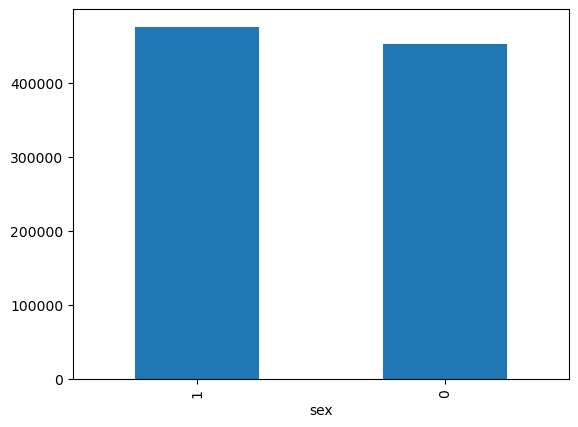

In [13]:
df['sex'].value_counts(normalize=False).plot.bar()

Проверим нормальность распределения

Нормальное распределение только у столбца рост

Почти нормальное у столбца вес,SGOT_AST и gamma_GTR

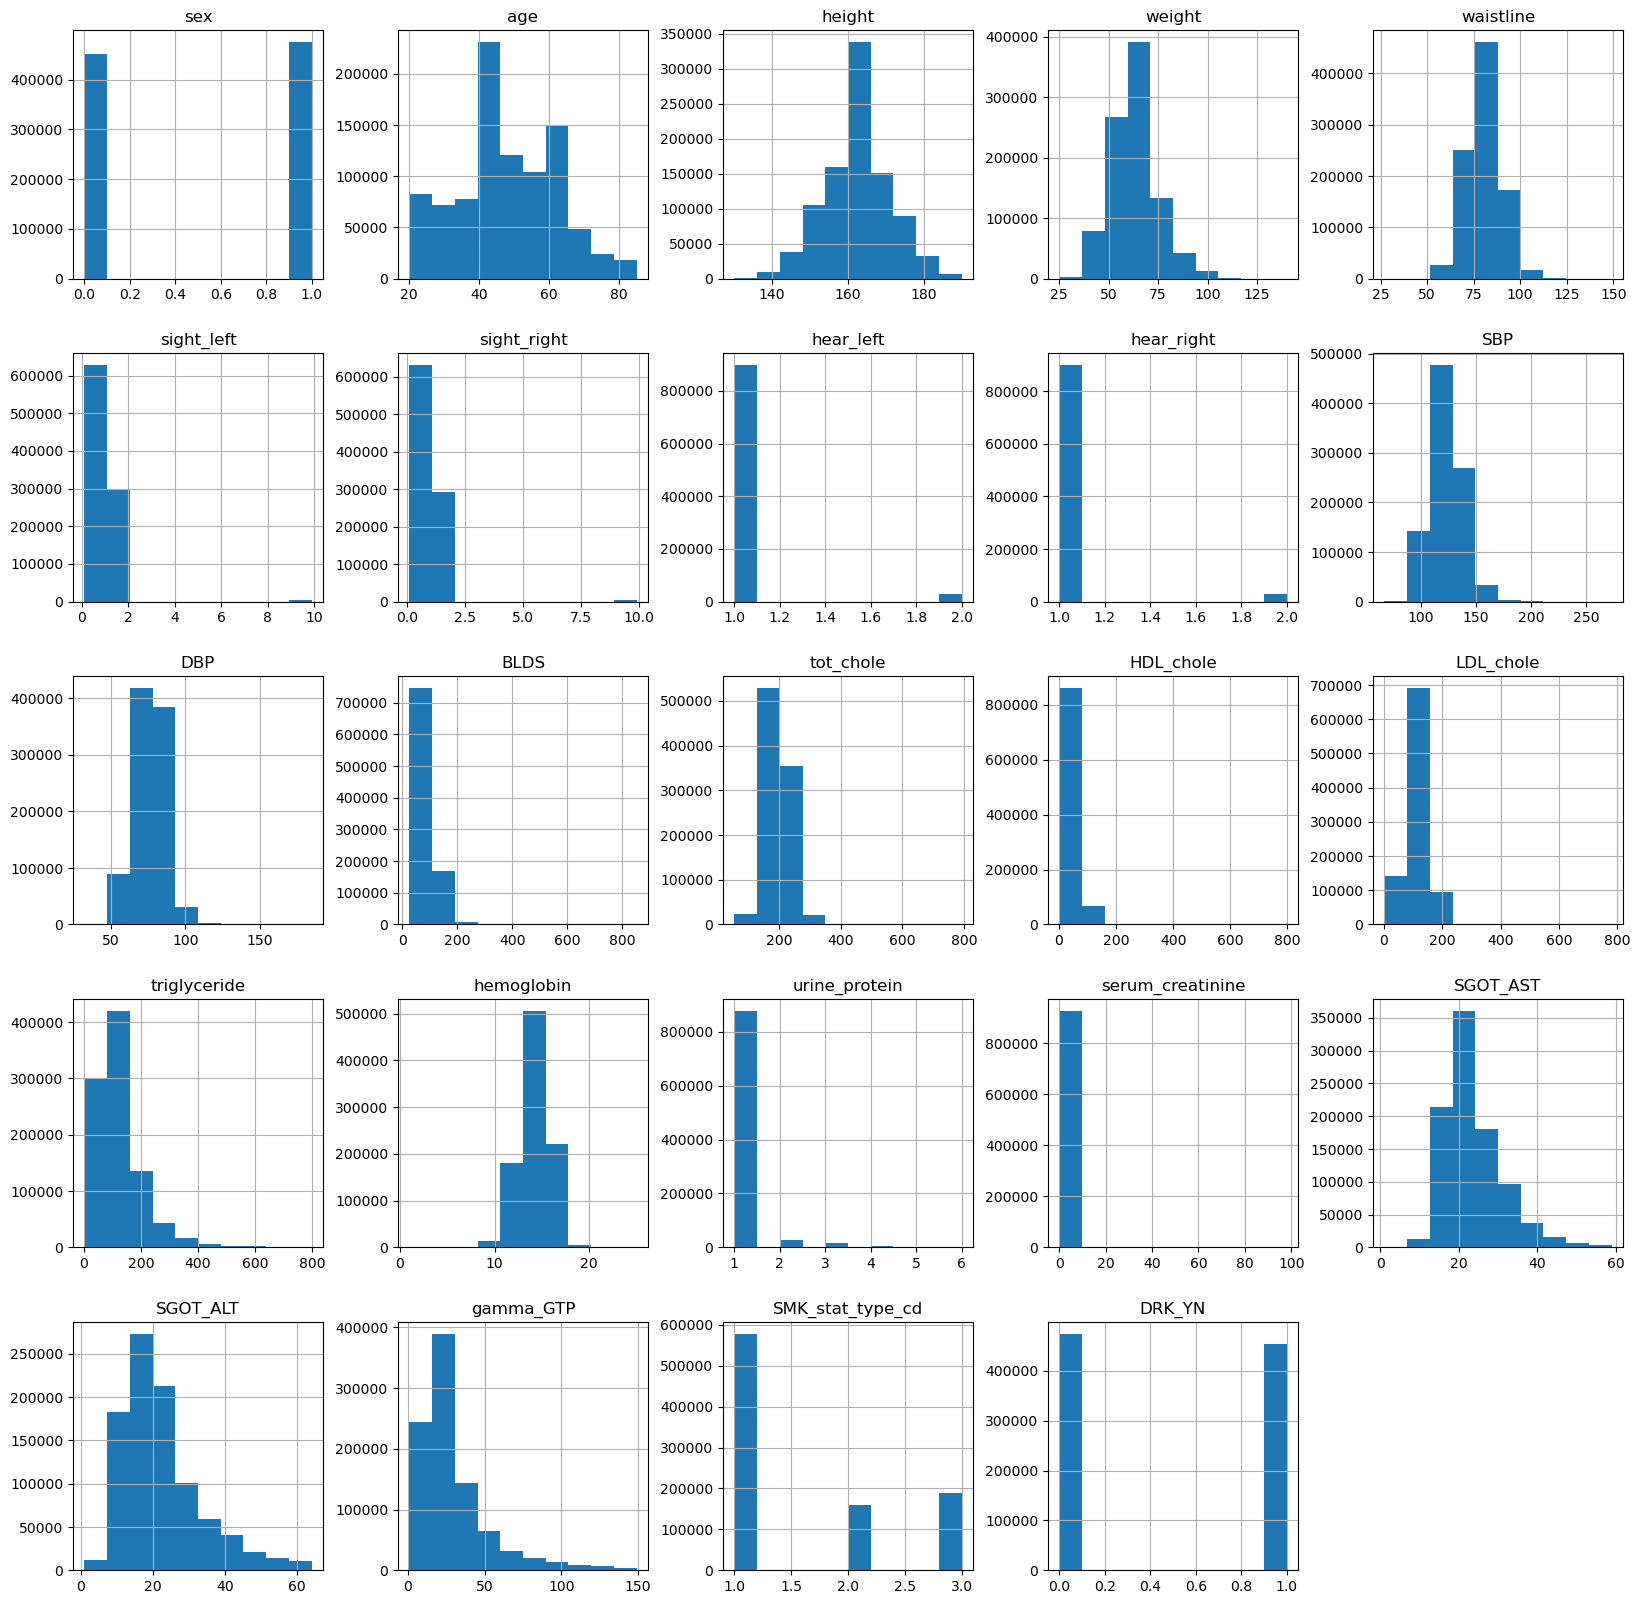

In [14]:
df.hist(figsize=(20,20));

Построили круговую диаграмму на основе стотлбца SMK_stat_type_cd

1 - Не курил

2 - Бросил курить

3 - Курит

<Axes: ylabel='proportion'>

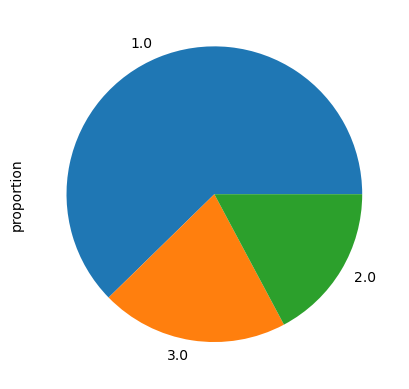

In [15]:
df['SMK_stat_type_cd'].value_counts(normalize=True).plot.pie()

Вывели теполвую карту. Высокая корреляция замечена среди столбцов: 

sex - height, hemoglobin

height - weight

weight - waistline

SBR - DBP

tot_chole - LDL_chole

SGOT_AST - SGOT_ALT

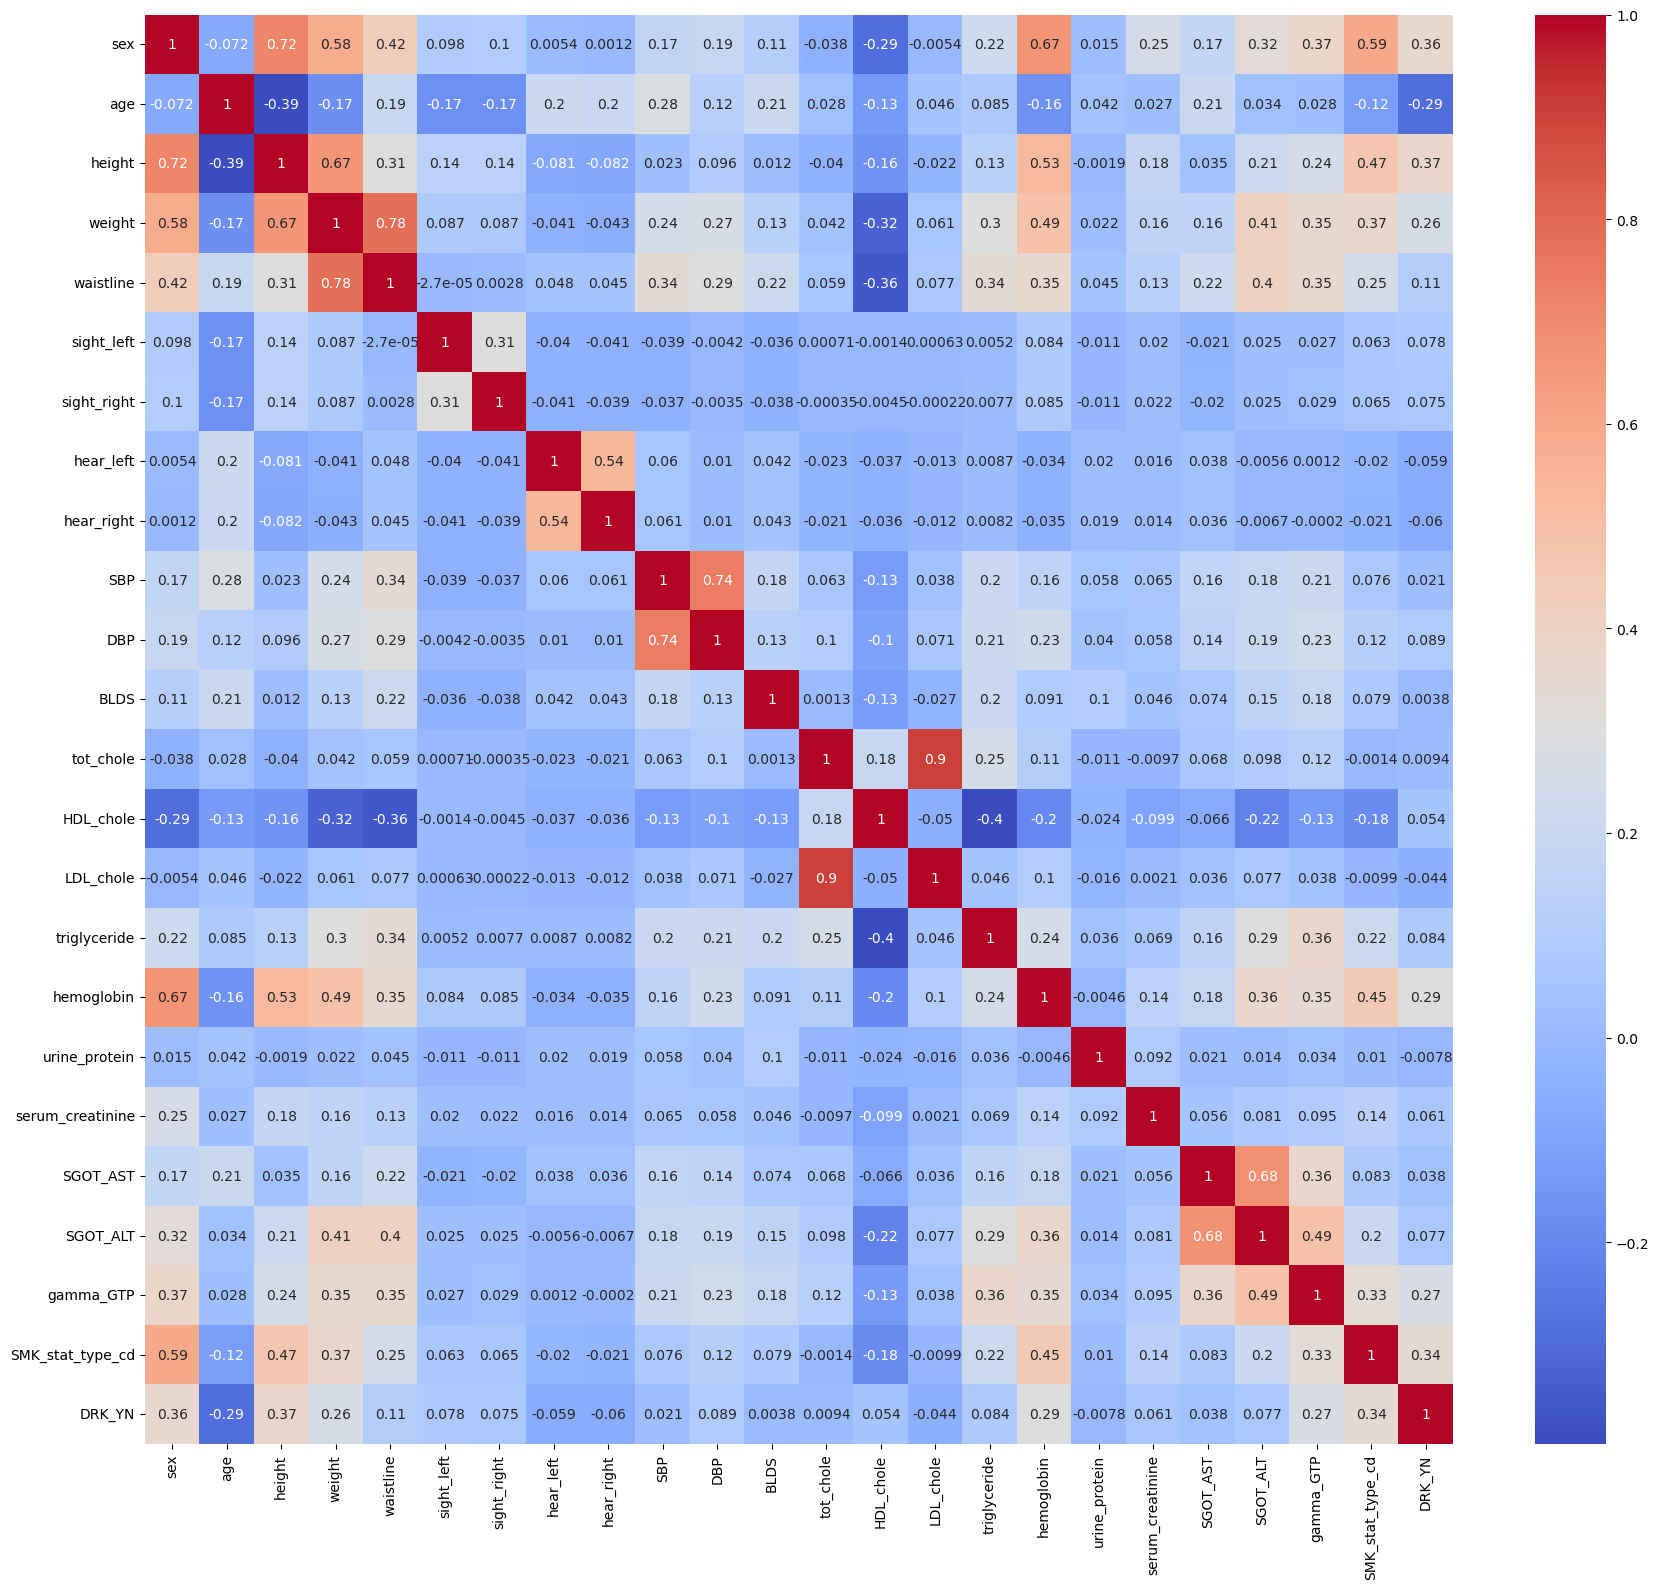

In [16]:
correlation_matrix = df.corr()

plt.figure(figsize=(18, 16))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2g')

plt.tight_layout()
plt.show()

### Modelling

Целевая переменная - SMK_stat_type_cd

In [17]:
X = df.copy()
del X['SMK_stat_type_cd']
y = df['SMK_stat_type_cd']

Раздаление данных на тренеровачные и тестовые

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(621645, 23) (306184, 23) (621645,) (306184,)


### KNeighborsClassifier (Классификация ближайших соседей)

In [19]:
%%time
knn = KNeighborsClassifier()

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

CPU times: total: 14min 13s
Wall time: 2min 32s


In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.73      0.86      0.79    190463
         2.0       0.34      0.26      0.29     52760
         3.0       0.45      0.28      0.35     62961

    accuracy                           0.64    306184
   macro avg       0.51      0.47      0.48    306184
weighted avg       0.60      0.64      0.61    306184



### Random Forest Classifier

In [21]:
%%time
rfc = RandomForestClassifier(random_state = 42)

rfc.fit(X_train, y_train)


rfc_pred_test = rfc.predict(X_test)

CPU times: total: 3min 18s
Wall time: 3min 18s


In [22]:
print(classification_report(y_test, rfc_pred_test))

              precision    recall  f1-score   support

         1.0       0.83      0.86      0.84    190463
         2.0       0.45      0.36      0.40     52760
         3.0       0.52      0.55      0.54     62961

    accuracy                           0.71    306184
   macro avg       0.60      0.59      0.59    306184
weighted avg       0.70      0.71      0.70    306184



Запомним метрики для будущего сравнения

In [23]:
rfc_precision = precision_score(y_test, rfc_pred_test, average='macro')
rfc_recall = recall_score(y_test, rfc_pred_test, average='macro')
rfc_f1 = f1_score(y_test, rfc_pred_test, average='macro')

### Logistic regression(Логистическая регресия)

In [24]:
%%time
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

lr = LogisticRegression(random_state = 42)

lr.fit(X_train, y_train)

lr_pred_test = lr.predict(X_test)

CPU times: total: 25.1 s
Wall time: 4.46 s


In [25]:
print(classification_report(y_test, lr_pred_test))

              precision    recall  f1-score   support

         1.0       0.82      0.85      0.84    190463
         2.0       0.45      0.33      0.38     52760
         3.0       0.50      0.57      0.53     62961

    accuracy                           0.70    306184
   macro avg       0.59      0.58      0.58    306184
weighted avg       0.69      0.70      0.70    306184



### Настройка гиперпараметров

Для настроки гиперпараметров используеться Random Forest Classifier, так как у этой модели самые лучшие значения по f1-score.

In [ ]:
%%time
from sklearn.model_selection import cross_val_score, GridSearchCV, learning_curve
# Hyperparameter tuning
param_grid = {'n_estimators': [100, 200, 300, 400]}

rfc_1 = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rfc_1, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)

Нашли что модель с 300 деревьями самая лучшая.

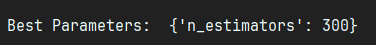

Обучаем модель c новыми параметрами

In [26]:
rfc_1 = RandomForestClassifier(n_estimators=300, random_state = 42)
rfc_1.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=42)

In [27]:
rfc1_pred_test = rfc_1.predict(X_test)

print(classification_report(y_test, rfc1_pred_test))

              precision    recall  f1-score   support

         1.0       0.83      0.86      0.84    190463
         2.0       0.46      0.36      0.40     52760
         3.0       0.52      0.56      0.54     62961

    accuracy                           0.71    306184
   macro avg       0.60      0.59      0.60    306184
weighted avg       0.70      0.71      0.71    306184



Сохраним данные для сравнения

In [28]:
rfc1_precision = precision_score(y_test, rfc1_pred_test, average='macro')
rfc1_recall = recall_score(y_test, rfc1_pred_test, average='macro')
rfc1_f1 = f1_score(y_test, rfc1_pred_test, average='macro')

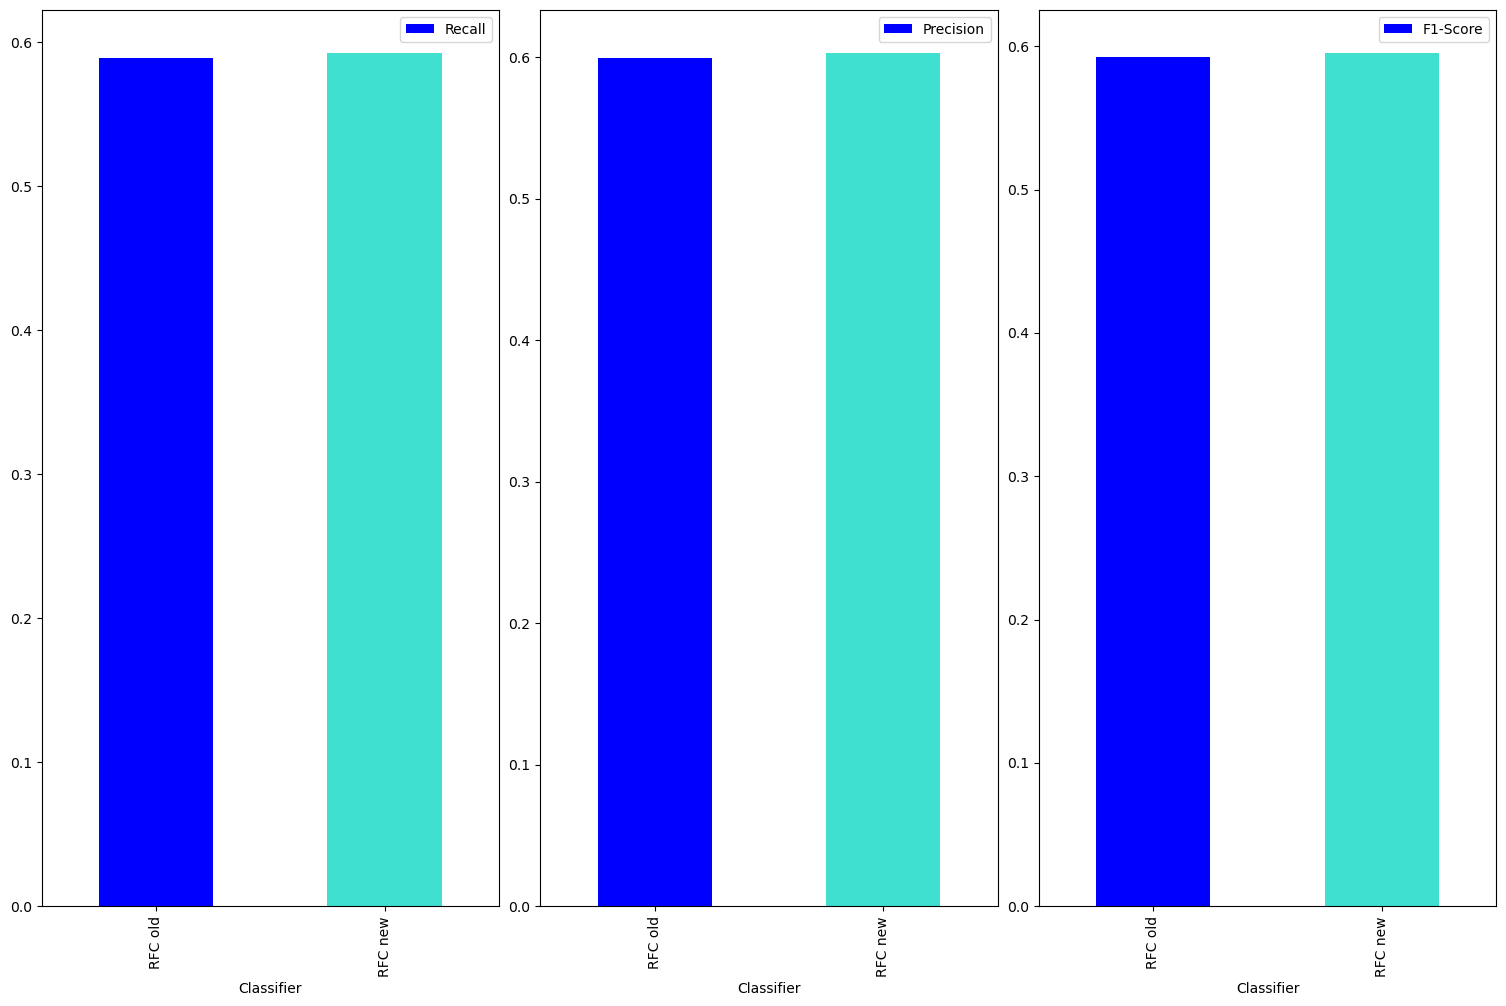

In [29]:
classifiers =["RFC old", "RFC new"]
log_cols = ["Recall", "Precision", "F1-Score"]
log = pd.DataFrame(columns=log_cols)

log["Classifier"] = classifiers
log.set_index('Classifier', inplace=True)

log["Recall"] = [rfc_recall, rfc1_recall]
log['Precision'] = [rfc_precision, rfc1_precision]
log["F1-Score"] = [rfc_f1, rfc1_f1]

fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(15,10))
index = 0
ax = ax.flatten()

for col, value in log.items():
    log[col].plot.bar(ax=ax[index], legend=True, color=['blue','turquoise'])
    index += 1
    
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

### Вывод

Самая лучшая модел это Random Forest Classifier, но она не так хорошо спровляеться со 2 и 3 классом.


Модель с 300 деревьями самая лучшая, есть улучшение параметров на 1% у macro avg и weighted avg.

Пустых значеный не наблюдалось, но были выбросы которые были устранены.

Данный датасет не сбалансированный.

Высокая корреляция заметна в основном у составных медецинских паказателей.